In [160]:
# mengimpor library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [161]:
# cek versi TensorFlow
print(tf.__version__)

2.2.0


In [162]:
# mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-17 15:30:30--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.90MB/s    in 57s     

2020-06-17 15:31:28 (5.40 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [168]:
pip install split_folders

In [169]:
# mengekstrak data yang telah diunduh
import zipfile,os
local_zip ='/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [170]:
# mendefinisikan direktori menggunakan split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/images", seed=1337, ratio=(.8, .2))
base_dir='/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3686.18 files/s]


In [171]:
# menciptakan data-data baru dari data yang telah ada
train_datagen = ImageDataGenerator(
                    validation_split=0.2,
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    validation_split=0.2,
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [172]:
# mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=3,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=3,
        class_mode='sparse')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [173]:
# membangun Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [174]:
# memanggil fungsi compile pada objek model, dan menentukan loss function serta optimizer.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [175]:
# melatih model menggunakan metode fit dengan menggunakan image data generator
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/50
25/25 - 6s - loss: 1.3037 - accuracy: 0.3867 - val_loss: 1.1022 - val_accuracy: 0.2000
Epoch 2/50
25/25 - 6s - loss: 1.0987 - accuracy: 0.3733 - val_loss: 1.1060 - val_accuracy: 0.1333
Epoch 3/50
25/25 - 6s - loss: 1.1015 - accuracy: 0.3067 - val_loss: 1.0930 - val_accuracy: 0.4667
Epoch 4/50
25/25 - 6s - loss: 1.0807 - accuracy: 0.4667 - val_loss: 1.1212 - val_accuracy: 0.2667
Epoch 5/50
25/25 - 6s - loss: 1.0879 - accuracy: 0.4933 - val_loss: 1.0605 - val_accuracy: 0.4667
Epoch 6/50
25/25 - 6s - loss: 1.1002 - accuracy: 0.3733 - val_loss: 1.0745 - val_accuracy: 0.5333
Epoch 7/50
25/25 - 6s - loss: 1.0171 - accuracy: 0.5067 - val_loss: 0.8629 - val_accuracy: 0.6000
Epoch 8/50
25/25 - 6s - loss: 0.8184 - accuracy: 0.6133 - val_loss: 0.8493 - val_accuracy: 0.4667
Epoch 9/50
25/25 - 6s - loss: 0.6346 - accuracy: 0.7333 - val_loss: 0.5275 - val_accuracy: 0.8000
Epoch 10/50
25/25 - 6s - loss: 0.6119 - accuracy: 0.7333 - val_loss: 0.9064 - val_accuracy: 0.6000
Epoch 11/50
25/25 -

Saving 3k7WrSAInCaatFtl.png to 3k7WrSAInCaatFtl.png
Saving 3kVoftgTNdDcvPPY.png to 3kVoftgTNdDcvPPY.png
Saving 4aWP3XumkgwZtqZ7.png to 4aWP3XumkgwZtqZ7.png
Saving 4burI8a7jyfTRBl6.png to 4burI8a7jyfTRBl6.png
Saving 4Pir885YNPXiRs0R.png to 4Pir885YNPXiRs0R.png
Saving 4QtEaLUAuzeJZKdK.png to 4QtEaLUAuzeJZKdK.png
[[0. 1. 0.]]
3k7WrSAInCaatFtl.png
rock
[[0. 0. 1.]]
3kVoftgTNdDcvPPY.png
scissors
[[1. 0. 0.]]
4aWP3XumkgwZtqZ7.png
paper
[[0. 0. 1.]]
4burI8a7jyfTRBl6.png
scissors
[[1. 0. 0.]]
4Pir885YNPXiRs0R.png
paper
[[0. 1. 0.]]
4QtEaLUAuzeJZKdK.png
rock


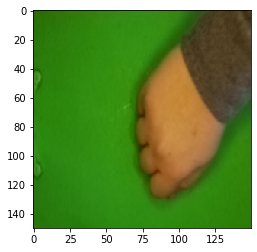

In [176]:
# melakukan resize gambar dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
# memprediksi gambar 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  else:
    print('scissors')